# **Product Review Sentiment Analysis and Rating Prediction** #

This project aims to analyse customer product reviews and predict the sentiment associated with the review text, leveraging Natural Language Processing (NLP) techniques and machine learning models. Sentiment analysis is key for understanding customer feedback and improving product quality, services and user satisfaction. The goal is to identify patterns in the reviews and classify them as positive, neutral or negative while exploring the correlation between review text and ratings.

**Problem Statement**: Given a dataset of product reviews with corresponding ratings, the challenge is to build a machine learning model that can predict the rating based on the review text. This can help companies automatically assess customer satisfaction and make data-driven decisions to improve their products and services. We will explore several models and assess their performance in terms of accuracy, precision and recall.

### **Key Steps in the Project** ###
- Data Collection: Load the dataset containing product reviews and ratings.
- Data Preparation: Clean and preprocess the data to ensure it is suitable for analysis.
- Exploratory Data Analysis (EDA): Understand the data structure, distribution of ratings and word frequencies in the reviews.
- Text Preprocessing: Tokenisation, removing stopwords, stemming/lemmatisation and vectorisation.
- Sentiment Analysis: Use NLP techniques to classify reviews into positive, neutral or negative sentiments.
- Model Selection: Train different machine learning models to predict product ratings.
- Evaluation: Compare model performance using relevant metrics like accuracy, precision and recall.
- Visualisation: Use visual tools to showcase key findings, such as the distribution of sentiment and model predictions.


### **Step 1: Load the Dataset** ###

In [3]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset, specifying the correct delimiter (comma in this case)
data = pd.read_csv(r"Amazon Product Review.txt", delimiter=',')

# Display the actual column names in the dataset
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date', 'sentiment']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

### **Step 2: Inspect the Dataset for Missing or Inconsistent Values** ###

In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("\nMissing values in each column:")
print(missing_values)

# Define the relevant columns
required_columns = ['review_body', 'star_rating']

# Check if the required columns exist in the dataset
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

# Display the first few rows of the relevant columns for verification
print("\nPreview of relevant columns:")
print(data[required_columns].head())


Missing values in each column:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64
All required columns are present.

Preview of relevant columns:
                                         review_body  star_rating
0                                      Great love it            5
1  Lots of ads<br />Slow processing speed<br />Oc...            3
2  Excellent unit.  The versatility of this table...            5
3  I bought this on Amazon Prime so I ended up bu...            4
4  All Amazon products continue to meet my expect...            5


### **Step 3: Data Cleaning** ###

In [5]:
# 1. Handle Missing Values
data.dropna(subset=['review_body'], inplace=True)  # Drop rows with missing review_body

# 2. Text Preprocessing
import re

# Function to clean the review text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags (if needed)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the cleaning function to the review_body
data['cleaned_review_body'] = data['review_body'].apply(clean_text)

# Display the first few rows of the cleaned data
print("\nPreview of cleaned review body:")
print(data[['cleaned_review_body', 'star_rating']].head())


Preview of cleaned review body:
                                 cleaned_review_body  star_rating
0                                      great love it            5
1  lots of adsslow processing speedoccasionally s...            3
2  excellent unit  the versatility of this tablet...            5
3  i bought this on amazon prime so i ended up bu...            4
4  all amazon products continue to meet my expect...            5


### **Step 4: Exploratory Data Analysis (EDA)** ###

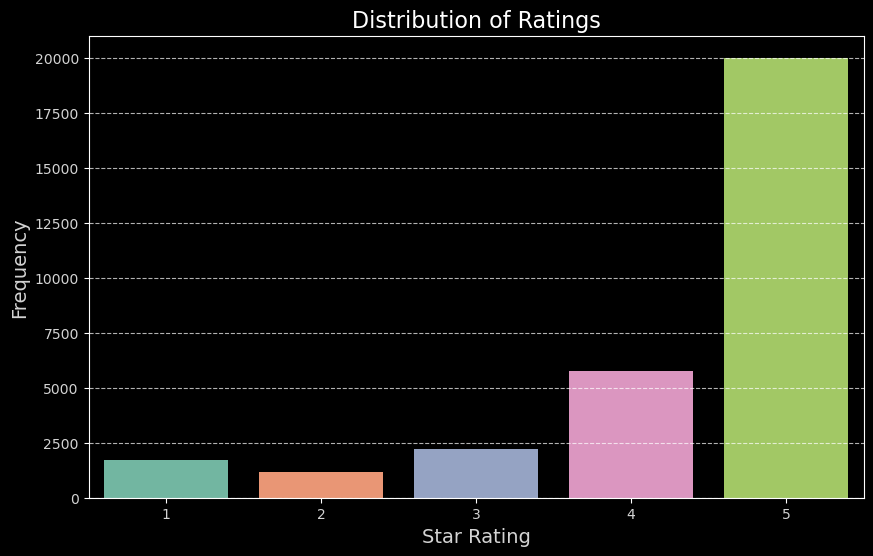

In [ ]:
# 1. Explore the Distribution of Ratings

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Set a style with a dark background
plt.style.use('dark_background')

# Count the occurrences of each rating
rating_counts = data['star_rating'].value_counts().sort_index()

# Plot the distribution of ratings with vibrant colors
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Set2")
plt.title('Distribution of Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Frequency', fontsize=14, color='lightgray')
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

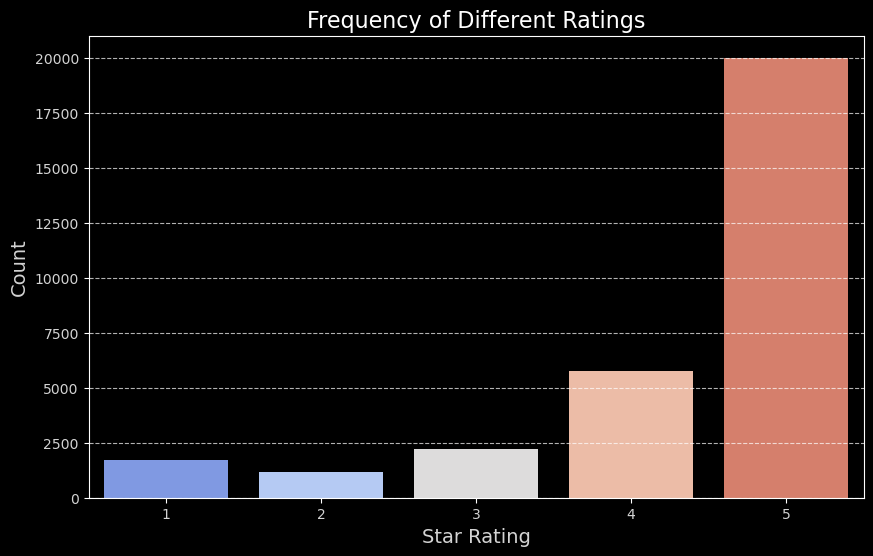

In [ ]:
# 2. Visualise the Frequency of Different Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', data=data, palette="coolwarm")
plt.title('Frequency of Different Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Count', fontsize=14, color='lightgray')
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='star_rating', ylabel='count'>

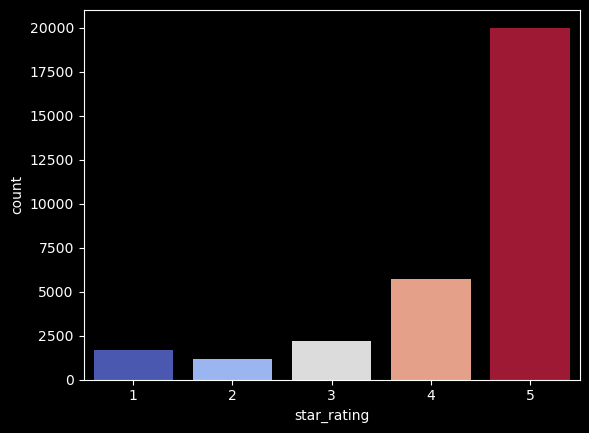

In [ ]:
sns.countplot(x='star_rating', data=data, palette="coolwarm", hue='star_rating', legend=False)

In [ ]:
# Combine all cleaned reviews into a single string
all_reviews = ' '.join(data['cleaned_review_body'])

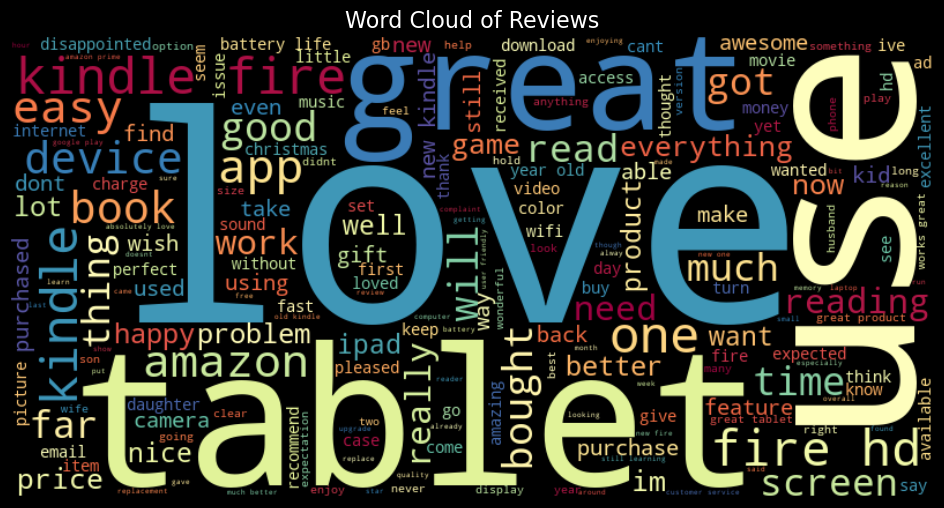

In [ ]:
# 3. Perform Basic Text Analysis - Word Cloud

# Combine all cleaned reviews into a single string
all_reviews = ' '.join(data['cleaned_review_body'])

# Generate a word cloud with a unique color scheme
wordcloud = WordCloud(width=800, height=400, background_color='black',
                      colormap='Spectral', contour_color='white',
                      contour_width=1).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Reviews', fontsize=16, color='white')
plt.show()

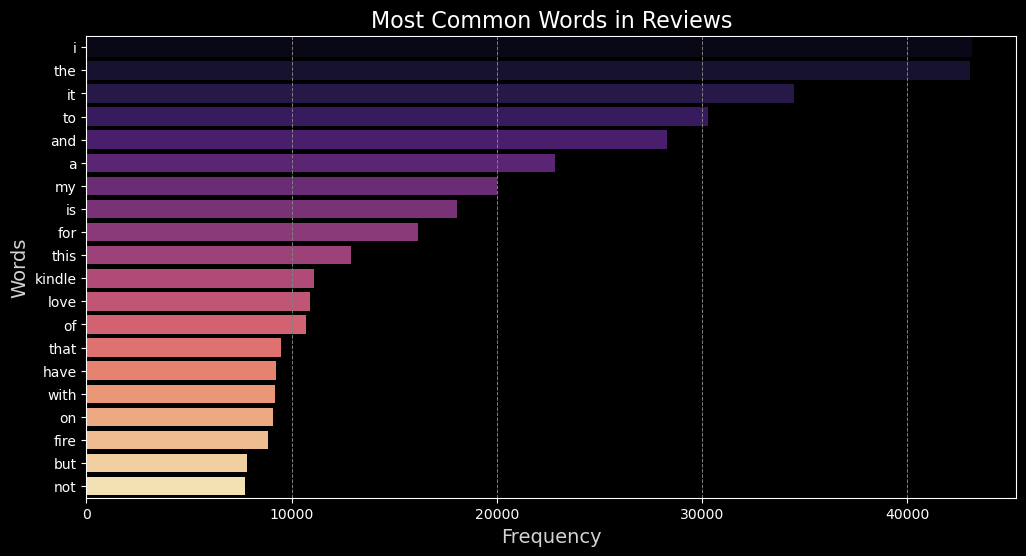

In [ ]:
# Most Common Words

# Tokenise the cleaned review body
all_words = ' '.join(data['cleaned_review_body']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words (e.g., top 20)
most_common_words = word_counts.most_common(20)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words with a vibrant color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='magma')
plt.title('Most Common Words in Reviews', fontsize=16, color='white')
plt.xlabel('Frequency', fontsize=14, color='lightgray')
plt.ylabel('Words', fontsize=14, color='lightgray')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
plt.show()

### **Step 4: Sentiment Analysis Preparation** ###

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = vectorizer.fit_transform(data['cleaned_review_body'])

# 2. Prepare target variable
y = data['star_rating']

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (24673, 5000)
Testing data shape: (6169, 5000)


In [28]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Print new class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")


Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})


In [29]:
from sklearn.model_selection import train_test_split

# Split resampled data into train and test sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")


Training size: 3740, Testing size: 935


### **Step 5: Train a Model** ###

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = model.predict(X_test_bal)


# Print the accuracy
print(f"Accuracy: {accuracy_score(y_test_bal, y_pred) * 100:.2f}%")

# Evaluate the model
print(classification_report(y_test_bal, y_pred))




Accuracy: 48.56%
              precision    recall  f1-score   support

           1       0.55      0.57      0.56       187
           2       0.43      0.37      0.40       187
           3       0.38      0.41      0.40       187
           4       0.43      0.39      0.41       187
           5       0.62      0.68      0.65       187

    accuracy                           0.49       935
   macro avg       0.48      0.49      0.48       935
weighted avg       0.48      0.49      0.48       935



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Make predictions
rf_predictions = rf_model.predict(X_test_bal)

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test_bal, rf_predictions) * 100)
print(classification_report(y_test_bal, rf_predictions))


Random Forest Model Accuracy: 43.31550802139038
              precision    recall  f1-score   support

           1       0.47      0.55      0.50       187
           2       0.37      0.40      0.39       187
           3       0.36      0.35      0.35       187
           4       0.39      0.26      0.31       187
           5       0.55      0.61      0.58       187

    accuracy                           0.43       935
   macro avg       0.43      0.43      0.43       935
weighted avg       0.43      0.43      0.43       935



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_bal, y_train_bal)

# Make predictions
gb_predictions = gb_model.predict(X_test_bal)

# Evaluate the model
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test_bal, gb_predictions) * 100)
print(classification_report(y_test_bal, gb_predictions))


Gradient Boosting Model Accuracy: 41.81818181818181
              precision    recall  f1-score   support

           1       0.51      0.45      0.48       187
           2       0.35      0.38      0.37       187
           3       0.32      0.30      0.31       187
           4       0.34      0.34      0.34       187
           5       0.57      0.62      0.59       187

    accuracy                           0.42       935
   macro avg       0.42      0.42      0.42       935
weighted avg       0.42      0.42      0.42       935



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_bal, y_train_bal)

# Make predictions
svm_predictions = svm_model.predict(X_test_bal)

# Evaluate the model
print("SVM Model Accuracy:", accuracy_score(y_test_bal, svm_predictions) * 100)
print(classification_report(y_test_bal, svm_predictions))


SVM Model Accuracy: 49.09090909090909
              precision    recall  f1-score   support

           1       0.56      0.57      0.57       187
           2       0.42      0.37      0.39       187
           3       0.38      0.47      0.42       187
           4       0.46      0.37      0.41       187
           5       0.65      0.66      0.65       187

    accuracy                           0.49       935
   macro avg       0.49      0.49      0.49       935
weighted avg       0.49      0.49      0.49       935



### **Step 6: Evaluating the Model and Making Predictions** ###

In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Convert the new review to the same format as the training data (vectorized form)
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Use the trained model to predict the sentiments
predictions = model.predict(new_reviews_vectorized)

# Map the predicted ratings to sentiments (optional)
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display the results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Convert the new review to the same format as the training data (vectorized form)
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Use the trained model to predict the sentiments
predictions = rf_model.predict(new_reviews_vectorized)

# Map the predicted ratings to sentiments (optional)
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display the results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Convert the new review to the same format as the training data (vectorized form)
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Use the trained model to predict the sentiments
predictions = gb_model.predict(new_reviews_vectorized)

# Map the predicted ratings to sentiments (optional)
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display the results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Convert the new review to the same format as the training data (vectorized form)
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Use the trained model to predict the sentiments
predictions = svm_model.predict(new_reviews_vectorized)

# Map the predicted ratings to sentiments (optional)
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display the results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
print("X_train shape:", X_train.shape)
print("Feature count:", X_train.shape[1])

X_train shape: (24673, 5000)
Feature count: 5000


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD

# Step 1: Apply Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (TruncatedSVD to 200 features)
svd = TruncatedSVD(n_components=2500, random_state=42)
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

# Step 4: Define SVM Parameter Grid for Optimization
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Step 5: Grid Search for Best SVM Parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_svd, y_train_bal)

# Step 6: Train Best Model
best_svm = grid_search.best_estimator_

# Step 7: Evaluate Model
svm_predictions = best_svm.predict(X_test_svd)
accuracy = accuracy_score(y_test_bal, svm_predictions)

print("Optimized SVM Accuracy:", accuracy * 100)
print(classification_report(y_test_bal, svm_predictions))



Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})
Training size: 3740, Testing size: 935
Reduced Feature Count: 2500
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Optimized SVM Accuracy: 49.518716577540104
              precision    recall  f1-score   support

           1       0.56      0.59      0.58       187
           2       0.44      0.38      0.41       187
           3       0.39      0.45      0.42       187
           4       0.46      0.37      0.41       187
           5       0.61      0.67      0.64       187

    accuracy                           0.50       935
   macro avg       0.49      0.50      0.49       935
weighted avg       0.49      0.50      0.49       935



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Transform new reviews using the same dimensionality reduction method as training data
new_reviews_pca = svd.transform(new_reviews_vectorized)  # If you used TruncatedSVD
# new_reviews_pca = pca.transform(new_reviews_vectorized)  # If you used PCA

# Predict using the trained model
predictions = best_svm.predict(new_reviews_pca)

# Map predicted labels to sentiments
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Under-sampling to balance dataset (less memory usage)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (Reduce SVD to 750 components)
svd = TruncatedSVD(n_components=2500, random_state=42)  # Adjust components to balance speed & accuracy
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

# Step 4: Define Logistic Regression Hyperparameter Grid (Efficient Search)
param_dist = {
    'C': np.logspace(-2, 2, 5),  # [0.01, 0.1, 1, 10, 100]
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Supports L1 and L2 regularization
}

# Step 5: Perform **Randomized Search** (Faster than Grid Search)
random_search = RandomizedSearchCV(LogisticRegression(max_iter=500), param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=2, verbose=1, random_state=42)
random_search.fit(X_train_svd, y_train_bal)

# Step 6: Train Best Model
best_logreg = random_search.best_estimator_

# Step 7: Evaluate Model
logreg_predictions = best_logreg.predict(X_test_svd)
accuracy = accuracy_score(y_test_bal, logreg_predictions)

print("Optimized Logistic Regression Accuracy:", accuracy * 100)
print(classification_report(y_test_bal, logreg_predictions))


Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})
Training size: 3740, Testing size: 935
Reduced Feature Count: 2500
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Logistic Regression Accuracy: 48.23529411764706
              precision    recall  f1-score   support

           1       0.54      0.57      0.55       187
           2       0.43      0.37      0.40       187
           3       0.38      0.41      0.40       187
           4       0.42      0.38      0.40       187
           5       0.62      0.68      0.65       187

    accuracy                           0.48       935
   macro avg       0.48      0.48      0.48       935
weighted avg       0.48      0.48      0.48       935



In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD
# Step 1: Under-sampling to balance dataset (less memory usage)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (Reduce SVD to 750 components)
svd = TruncatedSVD(n_components=750, random_state=42)  # Adjust components to balance speed & accuracy
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})
Training size: 3740, Testing size: 935
Reduced Feature Count: 750


In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

new_reviews_vectorized = vectorizer.transform(new_reviews)

# Transform new reviews using the same dimensionality reduction method as training data
new_reviews_pca = svd.transform(new_reviews_vectorized)  # If you used TruncatedSVD
# new_reviews_pca = pca.transform(new_reviews_vectorized)  # If you used PCA

# Predict using the trained model
predictions = best_logreg.predict(new_reviews_pca)

# Map predicted labels to sentiments
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Under-sampling to balance dataset (less memory usage)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (Reduce SVD to 750 components)
svd = TruncatedSVD(n_components=750, random_state=42)  # Adjust components to balance speed & accuracy
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

# Step 4: Define Logistic Regression Hyperparameter Grid (Efficient Search)
param_dist = {
    'C': np.logspace(-2, 2, 5),  # [0.01, 0.1, 1, 10, 100]
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Supports L1 and L2 regularization
}

# Step 5: Perform **Randomized Search** (Faster than Grid Search)
random_search = RandomizedSearchCV(LogisticRegression(max_iter=500), param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=2, verbose=1, random_state=42)
random_search.fit(X_train_svd, y_train_bal)

# Step 6: Train Best Model
best_logreg_1 = random_search.best_estimator_

# Step 7: Evaluate Model
logreg_predictions = best_logreg_1.predict(X_test_svd)
accuracy = accuracy_score(y_test_bal, logreg_predictions)

print("Optimized Logistic Regression Accuracy:", accuracy * 100)
print(classification_report(y_test_bal, logreg_predictions))


Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})
Training size: 3740, Testing size: 935
Reduced Feature Count: 750
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Logistic Regression Accuracy: 47.9144385026738
              precision    recall  f1-score   support

           1       0.55      0.56      0.55       187
           2       0.40      0.36      0.38       187
           3       0.37      0.40      0.38       187
           4       0.43      0.39      0.41       187
           5       0.62      0.69      0.65       187

    accuracy                           0.48       935
   macro avg       0.47      0.48      0.48       935
weighted avg       0.47      0.48      0.48       935



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

# Transform new reviews using the same dimensionality reduction method as training data
new_reviews_pca = svd.transform(new_reviews_vectorized)  # If you used TruncatedSVD
# new_reviews_pca = pca.transform(new_reviews_vectorized)  # If you used PCA

# Predict using the trained model
predictions = best_logreg.predict(new_reviews_pca)

# Map predicted labels to sentiments
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Negative

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Under-sampling to balance dataset (less memory usage)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (Reduce SVD to 750 components)
svd = TruncatedSVD(n_components=2500, random_state=42)  # Adjust components to balance speed & accuracy
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Implement SGD Logistic Regression
sgd_lr = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd_lr.fit(X_train_svd, y_train_bal)

# Step 5: Make Predictions
sgd_predictions = sgd_lr.predict(X_test_svd)

# Step 6: Evaluate Performance
print("SGD Logistic Regression Accuracy:", accuracy_score(y_test_bal, sgd_predictions) * 100)
print(classification_report(y_test_bal, sgd_predictions))

Resampled class distribution: Counter({1: 935, 2: 935, 3: 935, 4: 935, 5: 935})
Training size: 3740, Testing size: 935
Reduced Feature Count: 2500
SGD Logistic Regression Accuracy: 46.63101604278075
              precision    recall  f1-score   support

           1       0.47      0.74      0.57       187
           2       0.40      0.27      0.32       187
           3       0.38      0.33      0.35       187
           4       0.42      0.31      0.36       187
           5       0.60      0.68      0.64       187

    accuracy                           0.47       935
   macro avg       0.45      0.47      0.45       935
weighted avg       0.45      0.47      0.45       935



In [ ]:
# 3. Save the Trained Model
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(rf_model,'random_forest_model.pkl')
joblib.dump(gb_model,'gradient_boosting_model.pkl')
joblib.dump(svm_model,'svm_model.pkl')
joblib.dump(best_logreg,'best_lr.pkl')
joblib.dump(best_svm,'best_svm.pkl')
joblib.dump(sgd_lr,'best_sgd_lr.pkl')
# Save the vectorizer as well (since it's needed to process new data)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [6]:
# Load the model and vectorizer
import joblib
model = joblib.load('sentiment_analysis_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
gb_model = joblib.load('gradient_boosting_model.pkl')
svm_model = joblib.load('svm_model.pkl')
best_logreg = joblib.load('best_lr.pkl')
best_svm = joblib.load('best_svm.pkl')
vectorizer = joblib.load('vectorizer.pkl')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Under-sampling to Balance Classes
undersampler = RandomUnderSampler(sampling_strategy={1: 500, 2: 500, 3: 500, 4: 500, 5: 500}, random_state=42)
  # Keeps some imbalance
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 3: Dimensionality Reduction (SVD)
svd = TruncatedSVD(n_components=75, random_state=42)  # Reduce feature size
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)
print("Reduced Feature Count:", X_train_svd.shape[1])

# Step 4: Define Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Step 5: Hyperparameter Optimization
param_dist = {
    'n_estimators': randint(50, 200),  # Reduce from 500 to 200 for speed
    'max_depth': randint(3, 15),  # Prevent deep trees
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],  # Reduce feature selection
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist,
    n_iter=10, cv=3, scoring='accuracy',
    n_jobs=-1, verbose=1, random_state=42
)

# Step 6: Train Optimized Model
random_search.fit(X_train_svd, y_train_bal)

# Get Best Model
best_rf = random_search.best_estimator_
print("Best Random Forest Parameters:", random_search.best_params_)

# Step 7: Predict & Evaluate
rf_predictions = best_rf.predict(X_test_svd)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test_bal, rf_predictions) * 100)
print(classification_report(y_test_bal, rf_predictions))


Resampled class distribution: Counter({1: 500, 2: 500, 3: 500, 4: 500, 5: 500})
Reduced Feature Count: 75
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 180}
Optimized Random Forest Accuracy: 43.8
              precision    recall  f1-score   support

           1       0.50      0.59      0.54       100
           2       0.37      0.40      0.38       100
           3       0.28      0.25      0.27       100
           4       0.41      0.32      0.36       100
           5       0.59      0.63      0.61       100

    accuracy                           0.44       500
   macro avg       0.43      0.44      0.43       500
weighted avg       0.43      0.44      0.43       500



In [ ]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]
new_reviews_vectorized = vectorizer.transform(new_reviews)
# Transform new reviews using the same dimensionality reduction method as training data
new_reviews_pca = svd.transform(new_reviews_vectorized)  # If you used TruncatedSVD
# new_reviews_pca = pca.transform(new_reviews_vectorized)  # If you used PCA

# Predict using the trained model
predictions = best_rf.predict(new_reviews_pca)

# Map predicted labels to sentiments
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Negative

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Very Positive

Review: Somewhat Okay product
Predicted Sentiment: Very Positive



In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import TruncatedSVD
# Step 1: Under-sampling to balance dataset (less memory usage)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")

# Step 2: Train-Test Split After Resampling
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training size: {len(y_train_bal)}, Testing size: {len(y_test_bal)}")

# Step 3: Apply Dimensionality Reduction (Reduce SVD to 750 components)
svd = TruncatedSVD(n_components=750, random_state=42)  # Adjust components to balance speed & accuracy
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("Reduced Feature Count:", X_train_svd.shape[1])

Resampled class distribution: Counter({np.int64(0): 515, np.int64(1): 515, np.int64(2): 515, np.int64(3): 515, np.int64(4): 515})
Training size: 2060, Testing size: 515
Reduced Feature Count: 750


In [14]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!",
               "Terrible experience, the product broke after two days!",
               "Its ok but not as good as I expected.",
               "Not expected result from this product",
               "Somewhat Okay product"]

new_reviews_vectorized = vectorizer.transform(new_reviews)

# Transform new reviews using the same dimensionality reduction method as training data
new_reviews_pca = svd.transform(new_reviews_vectorized)  # If you used TruncatedSVD
# new_reviews_pca = pca.transform(new_reviews_vectorized)  # If you used PCA

# Predict using the trained model
predictions = ensemble.predict(new_reviews_pca)

# Map predicted labels to sentiments
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Neutral

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Positive

Review: Its ok but not as good as I expected.
Predicted Sentiment: Neutral

Review: Not expected result from this product
Predicted Sentiment: Positive

Review: Somewhat Okay product
Predicted Sentiment: Neutral



In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from collections import Counter

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Original class distribution
class_counts = Counter(y_train)
print("Original class distribution:", class_counts)

# Safe oversampling strategy: match all classes to the largest class count
max_count = max(class_counts.values())
sampling_strategy = {cls: max_count for cls in class_counts}

# Apply SMOTE safely
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled class distribution:", Counter(y_resampled))
# Step 2: Train-Test Split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 3: PCA Dimensionality Reduction (Faster with fewer components)
pca = PCA(n_components=750, random_state=42)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_bal)

print("Reduced Feature Count:", X_train_pca.shape[1])

# Step 4: Faster Base Models
logreg = LogisticRegression(max_iter=300, solver='liblinear')
ridge = RidgeClassifier()
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Step 5: Lightweight Stacking Model
stacking_model = StackingClassifier(
    estimators=[
        ('lr', logreg),
        ('ridge', ridge),
        ('tree', tree)
    ],
    final_estimator=LogisticRegression(max_iter=300),
    n_jobs=-1
)

# Step 6: Fit & Evaluate
stacking_model.fit(X_train_pca, y_train_bal)
y_pred = stacking_model.predict(X_test_pca)

acc = accuracy_score(y_test_bal, y_pred)
print("Stacked Ensemble Accuracy:", acc * 100)
print(classification_report(y_test_bal, y_pred))


Original class distribution: Counter({5: 15997, 4: 4554, 3: 1806, 1: 1381, 2: 935})
Resampled class distribution: Counter({5: 15997, 4: 15997, 1: 15997, 2: 15997, 3: 15997})
Reduced Feature Count: 750
Stacked Ensemble Accuracy: 67.77520785147215
              precision    recall  f1-score   support

           1       0.71      0.74      0.73      3200
           2       0.74      0.71      0.73      3199
           3       0.63      0.60      0.62      3199
           4       0.55      0.59      0.57      3200
           5       0.76      0.75      0.75      3199

    accuracy                           0.68     15997
   macro avg       0.68      0.68      0.68     15997
weighted avg       0.68      0.68      0.68     15997



In [9]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# STEP 1: Balance data using SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_resampled))

# STEP 2: Train-Test split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 3: Dimensionality reduction (SVD)
svd = TruncatedSVD(n_components=750, random_state=42)
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)
print("Reduced Feature Count:", X_train_svd.shape[1])

# STEP 4: Define base learners
xgb = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

logreg = LogisticRegression(max_iter=1000, solver='saga', penalty='l2', C=1.0)

# STEP 5: Define Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('logreg', logreg)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1
)

# STEP 6: Train and evaluate
ensemble.fit(X_train_svd, y_train_bal)
y_pred = ensemble.predict(X_test_svd)

print("\nEnsemble Accuracy:", accuracy_score(y_test_bal, y_pred) * 100)
print(classification_report(y_test_bal, y_pred))


Class distribution after SMOTE: Counter({5: 15997, 4: 15997, 1: 15997, 2: 15997, 3: 15997})
Reduced Feature Count: 750

Ensemble Accuracy: 81.75282865537288
              precision    recall  f1-score   support

           1       0.87      0.89      0.88      3200
           2       0.91      0.89      0.90      3199
           3       0.81      0.83      0.82      3199
           4       0.70      0.69      0.69      3200
           5       0.80      0.79      0.80      3199

    accuracy                           0.82     15997
   macro avg       0.82      0.82      0.82     15997
weighted avg       0.82      0.82      0.82     15997

